In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import control as ctl
from espectro import espectro1D

no filtro windowed sinc a frequencia de corte é -6dB e fica no meio da faixa de transição

Sendo assim, fc = (wp+ws)/2 e Bwt = ws-wp

C:\Users\aluno\AppData\Local\Temp\ipykernel_7988\3524217725.py:23: RuntimeWarning: invalid value encountered in scalar divide
  h[n] = (np.sin(2*np.pi*fc*(n-M/2))/(n-(M/2)))


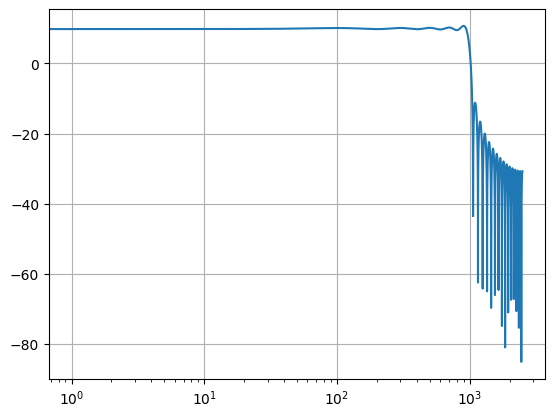

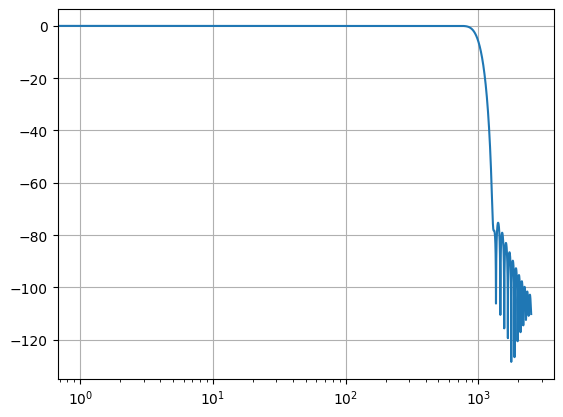

In [ ]:
wp = 800
rp = -1     #dB
ws = 1200
rs = -40    #dB

fs = 5000

fc = (ws+wp)/2
Bw = ws-wp

#Temos que normalizar fc e Bw pela frequencia de corte

fc = fc/fs
Bw = Bw/fs

#Calculando M (tamanho do kernel)

M = 4/Bw # Sempre arredondar M sendo acima e par
M = 50
h = np.zeros(M)

for n in range(0,M):
    h[n] = (np.sin(2*np.pi*fc*(n-M/2))/(n-(M/2)))

h[25] = 2*np.pi*fc #aqui, pela iteração existe uma divisão por 0, por isso esse ajuste


#Plot pelo sci
plt.figure()
plt.clf()
f,H = signal.freqz(h, 1, worN=2500, fs=fs)
plt.semilogx(f,20*np.log10(abs(H)))
plt.grid()

#aplicando a janela de blackman e normalizando h para hpb, onde o ganho é 0db
jan = np.blackman(M)
h = h*jan
hpb = h/np.sum(h)

plt.figure()
plt.clf()
f,H = signal.freqz(hpb, 1, worN=2500, fs=fs)
plt.semilogx(f,20*np.log10(abs(H)))
plt.grid()

C:\Users\aluno\AppData\Local\Temp\ipykernel_7988\421956856.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(f,20*np.log10(abs(H)))


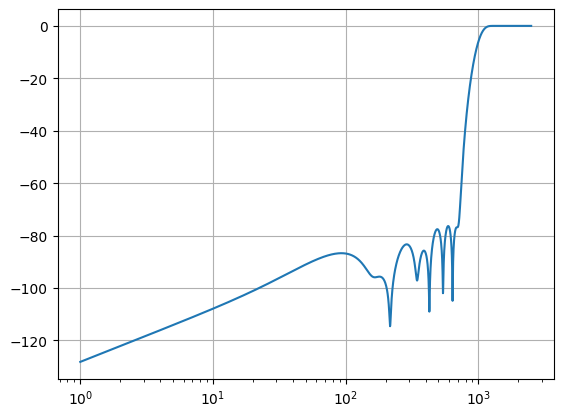

In [ ]:
#Passa altas

hpa = -hpb
hpa[25] = hpa[25]+1

plt.figure()
plt.clf()
f,H = signal.freqz(hpa, 1, worN=2500, fs=fs)
plt.semilogx(f,20*np.log10(abs(H)))
plt.grid()

ATIVIDADE

Caso os requisitos rp e rs não forem atingidos, aumentar o M

In [ ]:
from sinaisECAC14A_2024S2 import sinalAtv12

numMat = 2021007929
sinalAtv12(numMat)

with open('sinalAtv12.npy','rb') as arq:
    Ts = np.load(arq)
    s = np.load(arq)



[   26.00825993   +0.j          -279.24497941 +773.15245604j
 -1051.43775424 +288.55194939j ... -1529.56070582+1236.77458268j
 -1051.43775424 -288.55194939j  -279.24497941 -773.15245604j]


<StemContainer object of 3 artists>

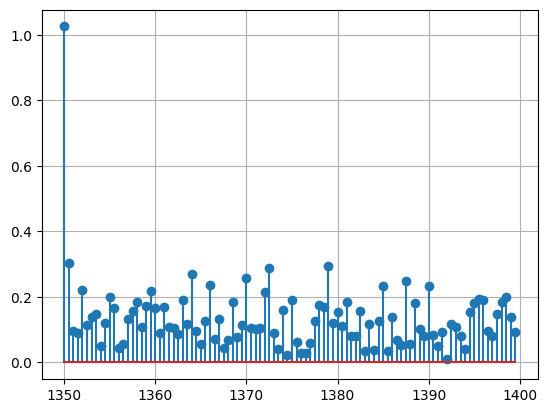

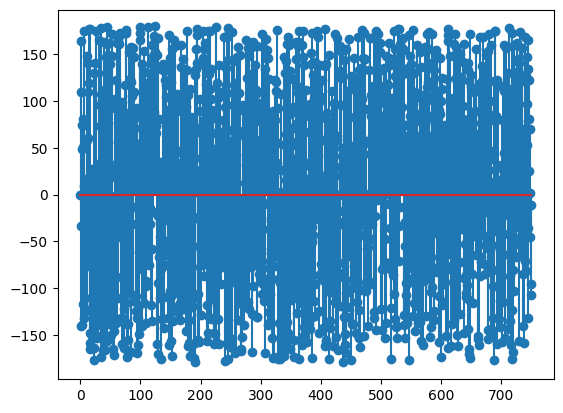

In [ ]:
N = len(s)
S = np.fft.fft(s)
print(S)
df = fs/N
f = np.arange(0, fs, df)


ini = 2700
fim = 2800

plt.figure()
plt.clf()
plt.stem(f[ini:fim], 2*abs(S[ini:fim])/N)
plt.grid()

plt.figure()
Fase = (np.angle( S[0:int(np.floor(N/2))] ) )*180/np.pi
plt.stem( f[0:1500], Fase[0:1500])

#f1 = 230hz  f2 = 570hz   f3 = 1350 hz   f4 = 1680hz

In [ ]:
def func (x, h):

    y = np.zeros(len(h)+len(x)-1)

    for p in range(0, len(x)):
        for q in range(0, len(h)):

            y[p+q] = y[p+q] + x[p]* h[q]


    return y

117.6470588235294
121.2121212121212


C:\Users\aluno\AppData\Local\Temp\ipykernel_7988\1104204350.py:36: RuntimeWarning: invalid value encountered in scalar divide
  h1[n] = (np.sin(2*np.pi*fc1*(n-(M/2)))/(n-(M/2)))
C:\Users\aluno\AppData\Local\Temp\ipykernel_7988\1104204350.py:37: RuntimeWarning: invalid value encountered in scalar divide
  h2[n] = (np.sin(2*np.pi*fc2*(n-(M/2)))/(n-(M/2)))


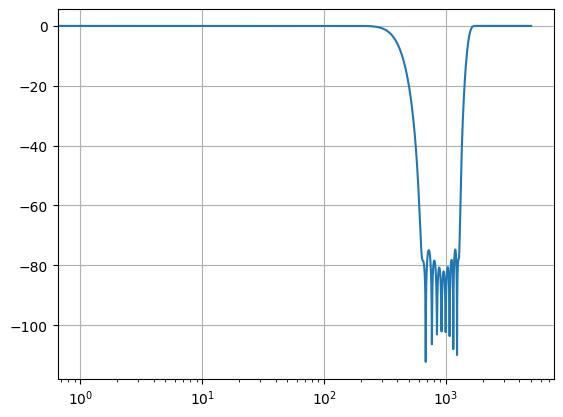

In [ ]:
# Parametros do filtro e parametros do kernel
wp1 = 230
ws1 = 570
ws2 = 1350
wp2 = 1680

fs = 1/Ts

fc1 = (wp1+ws1)/2
Bw1 = ws1-wp1

fc2 = (wp2+ws2)/2
Bw2 = wp2-ws2

fc1 = fc1/fs
Bw1 = Bw1/fs

fc2 = fc2/fs
Bw2 = Bw2/fs

# quantidade de amostras

M1 = 4/Bw1
M2 = 4/Bw2

print(M1)  # 117.6470588235294, adotar 118
print(M2)  # 121.2121212121212, adotar 122

# Como os dois tem tamanhos diferentes, normalizar ambos para 124
M = 124

#filtros 1 e 2
h1 = np.zeros(M)
h2 = np.zeros(M)
for n in range(0, M):
    h1[n] = (np.sin(2*np.pi*fc1*(n-(M/2)))/(n-(M/2)))
    h2[n] = (np.sin(2*np.pi*fc2*(n-(M/2)))/(n-(M/2)))

# Ponto de divisão por 0
h1[int(M/2)] = 2*np.pi*fc1
h2[int(M/2)] = 2*np.pi*fc2

# janela, normalização e adaptação do passa alta
jan = np.blackman(M)
h1 = h1*jan
h1 = h1/np.sum(h1)
h2 = h2*jan
h2 = h2/np.sum(h2)
hpa = -h2
hpa[int(M/2)] = hpa[int(M/2)]+1

# criação do rejeita faixa
hrf = h1+hpa

plt.figure()
plt.clf()
f3, H3 = signal.freqz(hrf, 1, worN = int(fs/2), fs = fs)
plt.semilogx(f3, 20*np.log10(abs(H3)))
plt.grid()




In [ ]:
print(abs(H3[230]), " em 230Hz")
print(abs(H3[570]), " em 570Hz")
print(abs(H3[1350]), " em 1350Hz")
print(abs(H3[1680]), " em 1680Hz")


0.9926732979119554  em 230Hz
0.007573832104100136  em 570Hz
0.009626994446050557  em 1350Hz
0.9903800629839179  em 1680Hz


20000


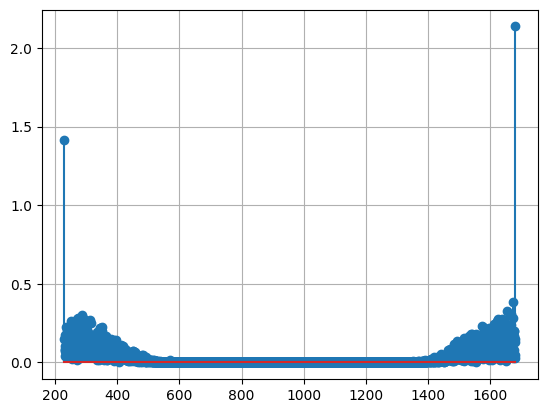

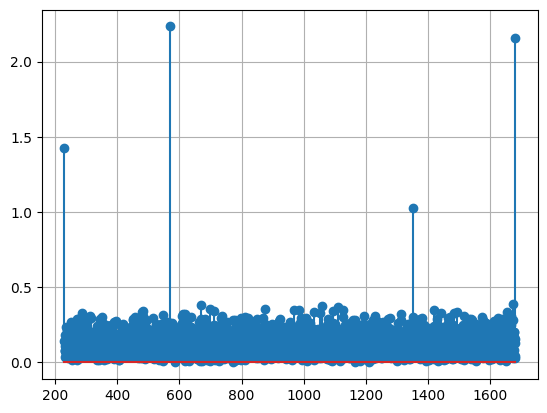

In [ ]:
# filtragem
spf = np.convolve(s, hrf)# convolução
spf = spf[123:20123]#retira o efeito de borda
print(len(spf))

N = len(spf)
SPF = np.fft.fft(spf)
df = fs/N
f = np.arange(0, fs, df)


ini = 460
fim = 3361

plt.figure()
plt.clf()
plt.stem(f[ini:fim], 2*abs(SPF[ini:fim])/N)
plt.grid()

plt.figure()
plt.clf()
plt.stem(f[ini:fim], 2*abs(S[ini:fim])/N)
plt.grid()


In [ ]:
print((2*abs(SPF[460])/(N))/(2*abs(S[460])/(N)), "% do sinal original em 230 Hz")
print(2*abs(SPF[1140])/(N)/(2*abs(S[1140])/(N)), "% do sinal original em 570 Hz")
print(2*abs(SPF[2700])/(N)/(2*abs(S[2700])/(N)), "% do sinal original em 1350 Hz")
print(2*abs(SPF[3360])/(N)/(2*abs(S[3360])/(N)), "% do sinal original em 1680 Hz")

0.9897910360028429 % do sinal original em 230 Hz
0.00819031997413697 % do sinal original em 570 Hz
0.008742907145558115 % do sinal original em 1350 Hz
0.9898164845225305 % do sinal original 1680 Hz
